## PRACTICAL 5 DRAFT :: Analytics

Tasks:
1. Understanding Forecasting In Business Intelligence
2. Using A Forecasting Tool In Python
3. A Simple Prediction
4. A Complex Prediction
5. A Business Intelligence Scenario

## Task 1 - Understanding Forecasting In Business Intelligence

When attempting to 'forecast' the future, we typically look to data from the past to assist us. In statistics, forecasting can provide a great advantage to a variety of tasks e.g. predicting the weather, stock growth, popular trends, and even life expectancy.

When forecasting, it is not enough to look at the data over time and to assume which way the trend is going to go, especially if the data you are looking at is unpredictable. Take for example the slope below:

![png image](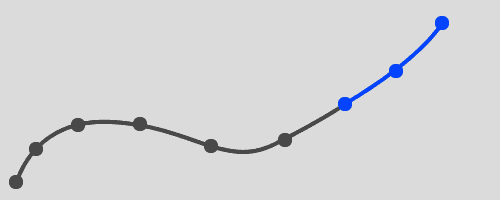
)

We might predict that, because the slope is starting to arch upwards that it will continue to rise (as shown in blue). Unfortunately, this prediction is weak, as it doesn't consider parts of the slope where the arch may've dipped right after rising.

This is why analysts may use 'time-series' modelling to generate predictions for them. Where 'time-series' modelling overtakes basic prediction methods, is that it infers everything it can about past data, going further than looking at just parts of the slope, but instead calculating for the entire slope how the prediction should be cast. In the image below, we have used the same slope from the first example, but this time applied 'time-series' modelling:

![png image](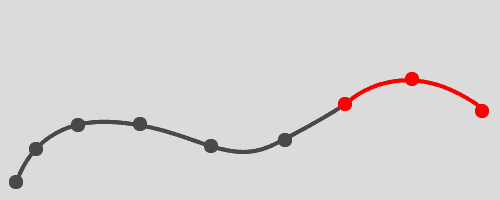
)

Notice how this time, the slope is predicted to dip instead (as shown in red). This is because the 'time-series' modelling tool has considered an earlier part in the slope where, right after rising, the slope may've dipped.


For casting predictions like this, a range of tools exist, which (by using powerful inference techniques) can form accurate inferences about even the most unpredictable data.

## Task 2 - Using A Forecasting Tool In Python

In Python, a range of tools exist for casting predictions, and more specifically, 'time-series' modelling. One of which, entitled 'Prophet', was invented by Facebook Inc for statistical use relating to challenging predictions they may've had to formulate at their company.

Fortunately for us, Facebook released this forecasting tool to the wider public, so now anybody looking to use it can do so within Python. To install Prophet:

* Go to you Jupyter Notebook's main page.
* Click the 'New' menu in the top right corner of the page.
* In the menu, select 'Terminal'. This will open a black terminal window.
* From the terminal window, enter the following command into the command line:

Installation may take a few minutes, so be patient. If you have installed it correctly, you will be able to successfully run the following line of code without error:

In [1]:
from fbprophet import Prophet

In the next task, we'll be using Prophet to demonstrate how it works, by modelling a simple prediction.

## Task 3 - A Simple Prediction

In this task, we'll be looking at how Prophet extrapolates data, and will demonstrate how a prediction can be made, using Prophet's functionality.

To start, execute the following code, ensuring that you have the 'task_3.csv' file in the same directory as this notebook file:

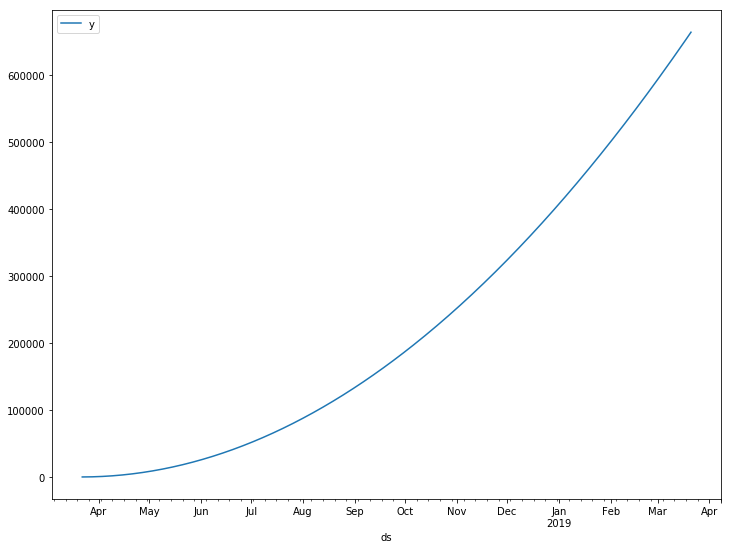

In [9]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

path = 'task_3.csv'
data = pd.read_csv(path)
data['ds'] = pd.to_datetime(data['ds'])
data.set_index('ds').plot(figsize=(12, 9))

This snippet of code has retrieved some data relating to a statistic that has grown over the course of a year, and has plotted it to show that it is has an exponential rate of growth. So how do we predict where the trend is going to go?

In the code below, we call the Prophet module to cast a prediction for what the next 365 days are going to like after this trend, and then plot the prediction:

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


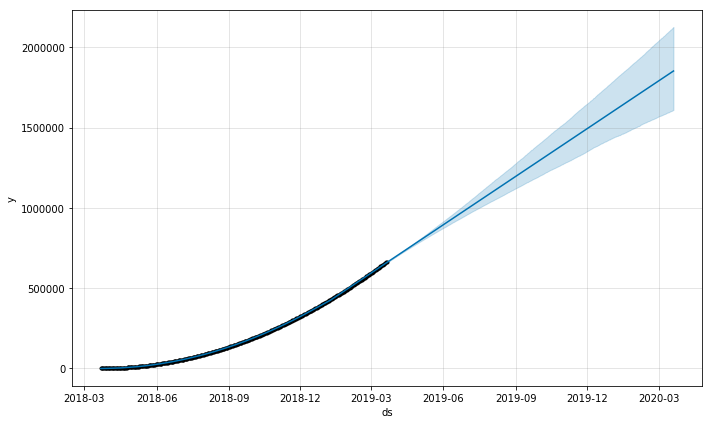

In [10]:
def cast_prediction(arg_data):
    m = Prophet()
    m.fit(arg_data)
    future_data = m.make_future_dataframe(periods=365)
    forecast = m.predict(future_data)
    m.plot(forecast);
    
cast_prediction(data)

Notice how the prediction not only forms a deep blue line of 'best fit', but also has a light blue area to show a range of possible scenarios for how the curve may end up. This is a great feature for considering edge cases, where the best or worst outcome for the trend may eventuate.

## Task 4 - A Complex Prediction

In the last task, we formed a prediction on a relatively predictable trend that didn't demonstrate any unexpected changes in its data over the time axis.

In this task however, we're going to be working with a trend that oscillates, meaning that it has regular changes in its relative projection of growth. To start, we'll need to load up the data. Execute the code below to do this:

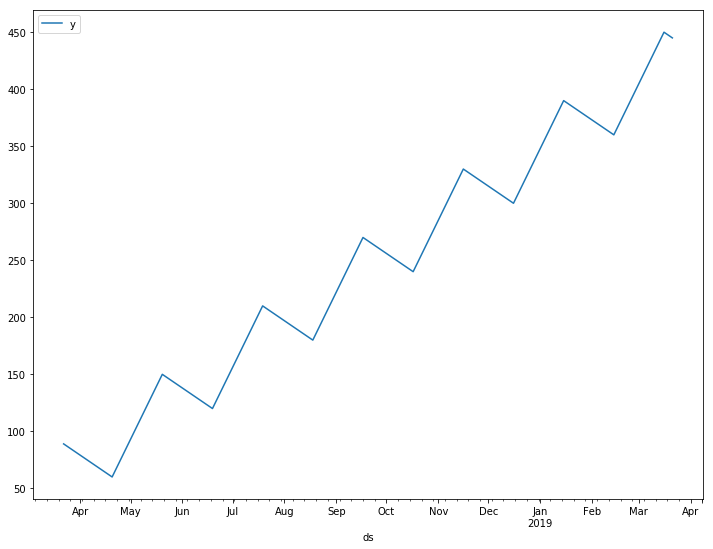

In [4]:
path_t4 = 'task_4.csv'
data_t4 = pd.read_csv(path_t4)
data_t4['ds'] = pd.to_datetime(data_t4['ds'])
data_t4.set_index('ds').plot(figsize=(12, 9))

As you can see, although the trend grows over time, it is hard to make an accurate prediction considering its 'lows' and 'highs' across the trend.

To cast a prediction on this data, the following function is introduced:

In [5]:
def cast_complex_prediction(arg_data):
    m = Prophet(yearly_seasonality=True)
    m.fit(arg_data)
    future_data = m.make_future_dataframe(periods=300)
    forecast = m.predict(future_data)
    m.plot(forecast)

In comparing it to our first function that we used to cast predictions, it is quite similar, differing only in that it has specified that it will be using 'yearly_seasonality' to calculate the outcome. To understand how this affects the results, we execute both this function and the previous function on the same dataset to see the differences:

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.5/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


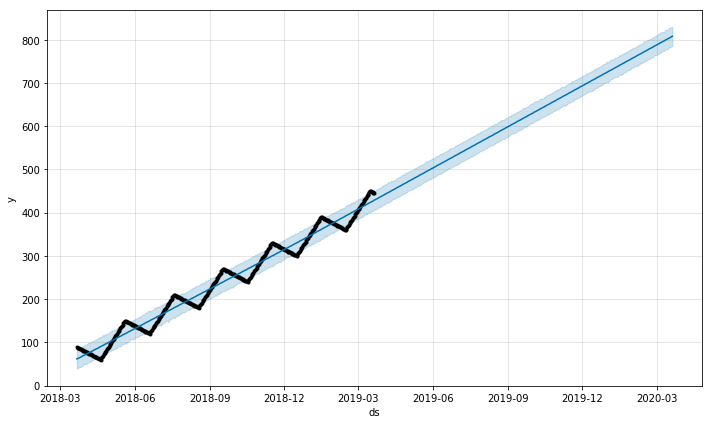

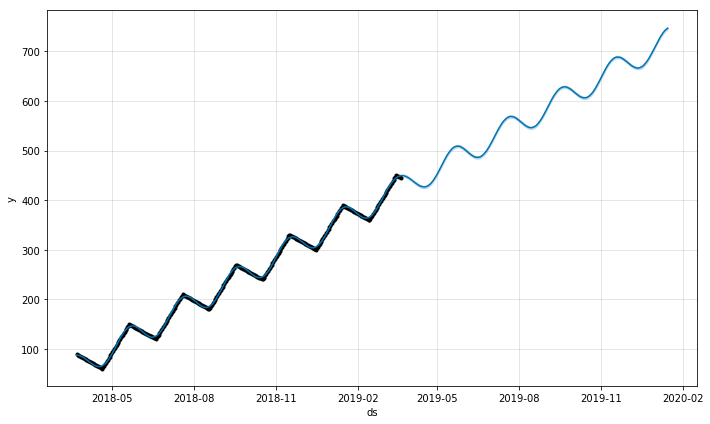

In [6]:
cast_prediction(data_t4)
cast_complex_prediction(data_t4)

As we can see, the first function would've only been able to roughly predict the trend on a very rigid line of best fit.

Alternatively, adding 'seasonality' has made it possible for us to model the trend, right down to the specifics of understanding its 'highs' and 'lows' over time. This allows for a more accurate prediction.

## Task 5 - A Business Intelligence Scenario

As a financial analyst working within a department of researchers, it has come to your attention that within the apst year, despite infrequent funding, your department has steadily entered deficit.

This is not a problem, as your department will be finished its research campaign in approximately nine months and twenty-nine days, and one of your stakeholders has agreed to offset the deficit.

The only issue is that the deficit is scheduled to increase, and the trend of loss is too unpredictable to make an accurate judgement on how many funds will be needed by the end of the research campaign. To make matters worse, the head of the team has requested that you approximate the required funds to the nearest $100, so as to maintain professionalism with your stakeholder, and to provide reassurance that your research team has the foresight to assert how many funds will be needed.

How many funds will be needed? Use the knowledge acquired so far in this practical to develop your solution.

* NOTE: For this task, use the 'task_5.csv', which you can assume contains the readings of funds for the last year.

In [7]:
path_t5 = 'task_5.csv'
data_t5 = pd.read_csv(path_t5)
data_t5['ds'] = pd.to_datetime(data_t5['ds'])

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.5/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


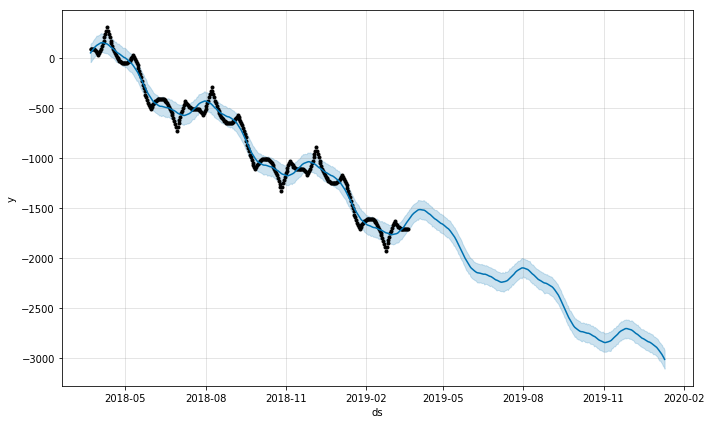

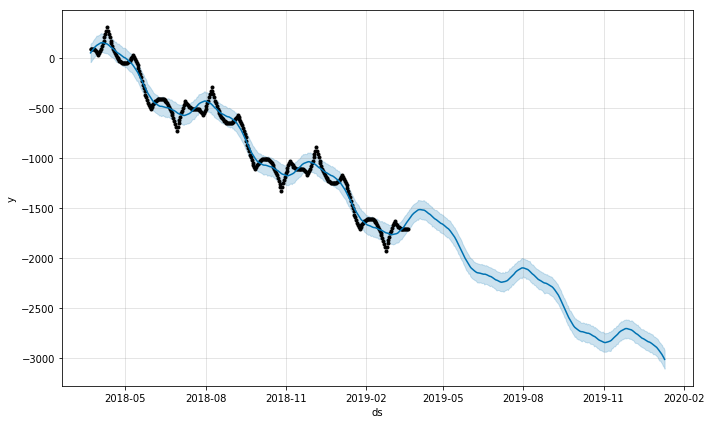

In [8]:
m_5 = Prophet(yearly_seasonality=True)
m_5.fit(data_t5)
m_5.plot(m_5.predict(m_5.make_future_dataframe(periods=295))) # 9 mths. and 21 days is 295 days all up

Hence approx. $3000 will be needed.